performing EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")


In [8]:
print("Customers Data:")
display(customers.head())
print("\nProducts Data:")
display(products.head())
print("\nTransactions Data:")
display(transactions.head())

Customers Data:


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15



Products Data:


,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31



Transactions Data:


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [9]:
print("\nMissing Values in Customers:", customers.isnull().sum())
print("\nMissing Values in Products:", products.isnull().sum())
print("\nMissing Values in Transactions:", transactions.isnull().sum())


Missing Values in Customers: CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing Values in Products: ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing Values in Transactions: TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


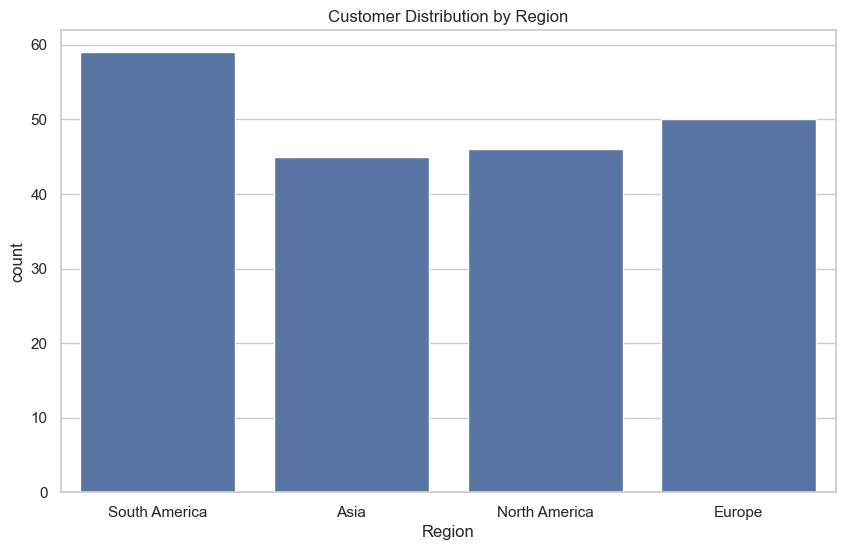

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Region', data=customers)
plt.title('Customer Distribution by Region')
plt.show()

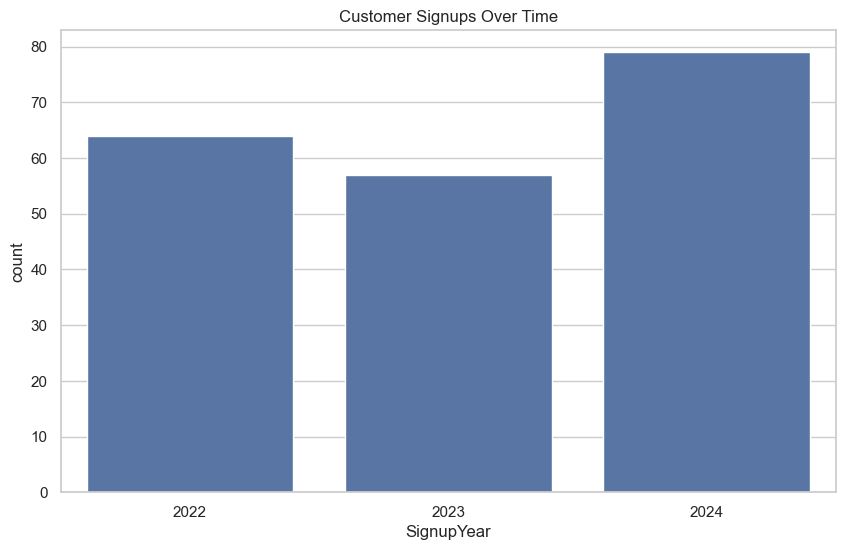

In [11]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customers['SignupYear'] = customers['SignupDate'].dt.year
plt.figure(figsize=(10, 6))
sns.countplot(x='SignupYear', data=customers)
plt.title('Customer Signups Over Time')
plt.show()

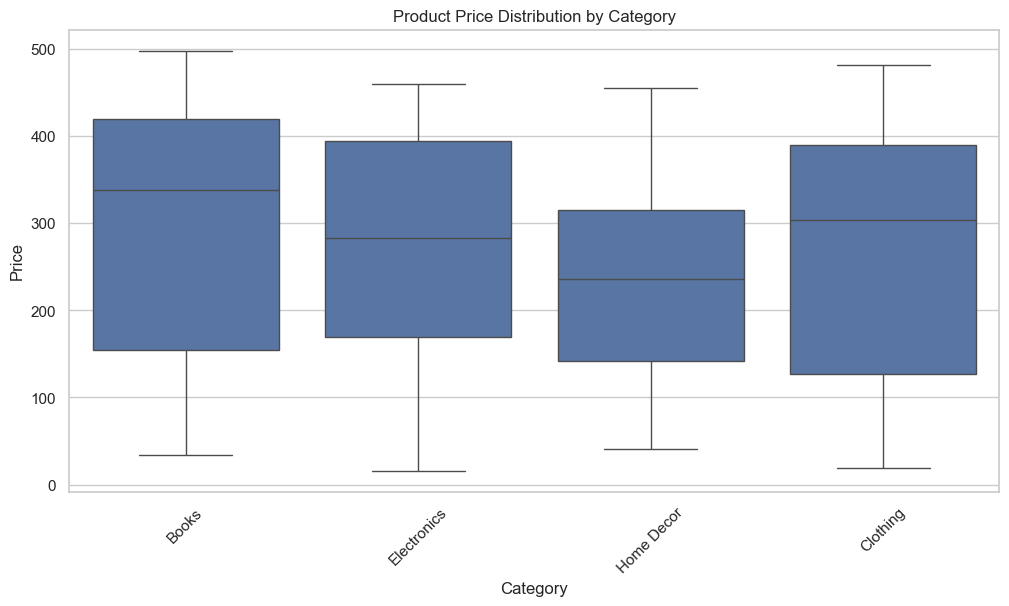

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Price', data=products)
plt.title('Product Price Distribution by Category')
plt.xticks(rotation=45)
plt.show()

<Axes: title={'center': 'Total Sales by Product Category'}, xlabel='Category'>

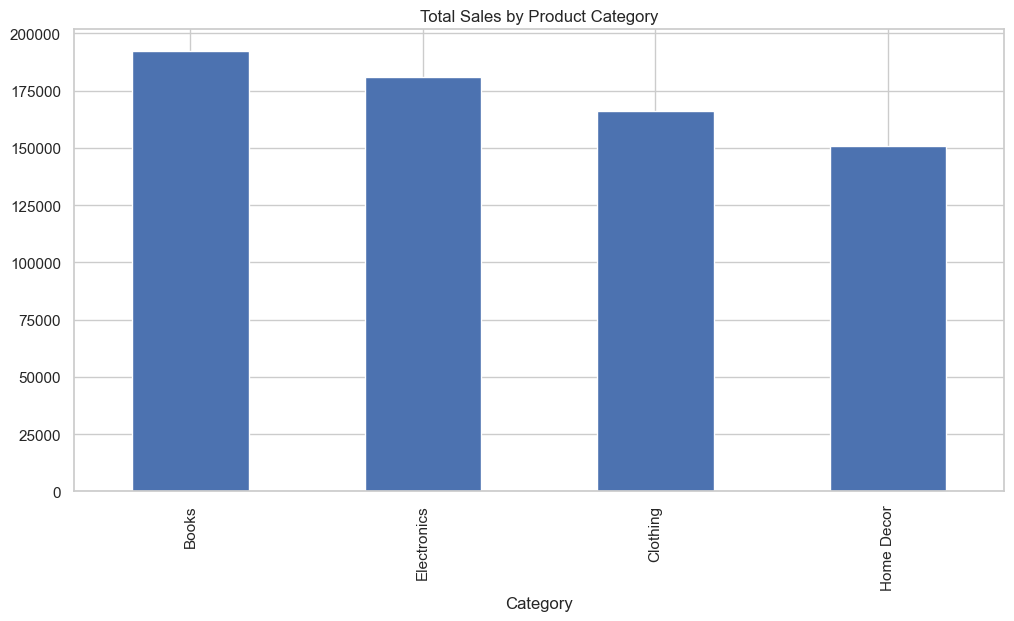

In [13]:
transactions_merged = transactions.merge(products, on='ProductID')
category_sales = transactions_merged.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
category_sales.plot(kind='bar', title='Total Sales by Product Category')

<Axes: title={'center': 'Monthly Sales Trend'}, xlabel='Month'>

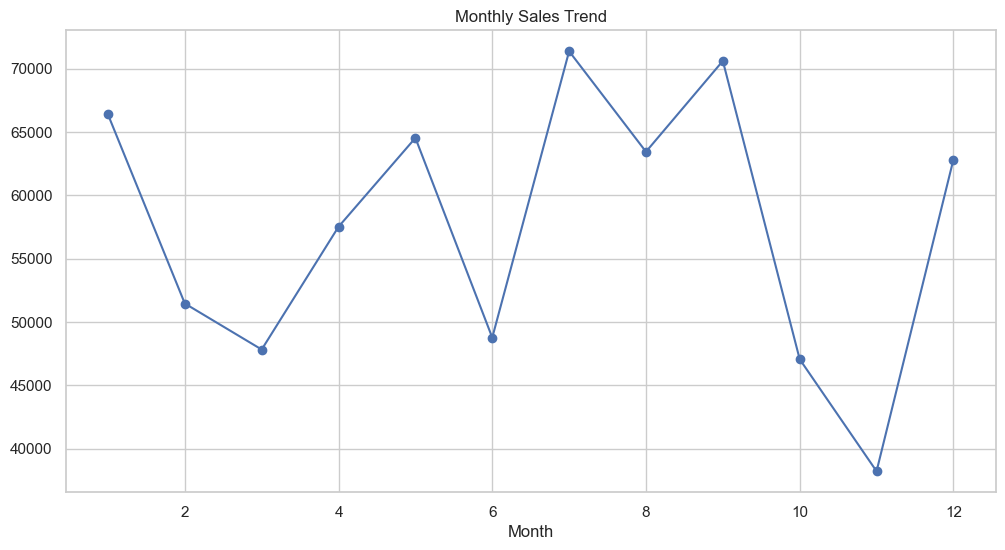

In [14]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['Month'] = transactions['TransactionDate'].dt.month
monthly_sales = transactions.groupby('Month')['TotalValue'].sum()
monthly_sales.plot(marker='o', title='Monthly Sales Trend')

<Axes: title={'center': 'Average Transaction Value by Region'}, xlabel='Region'>

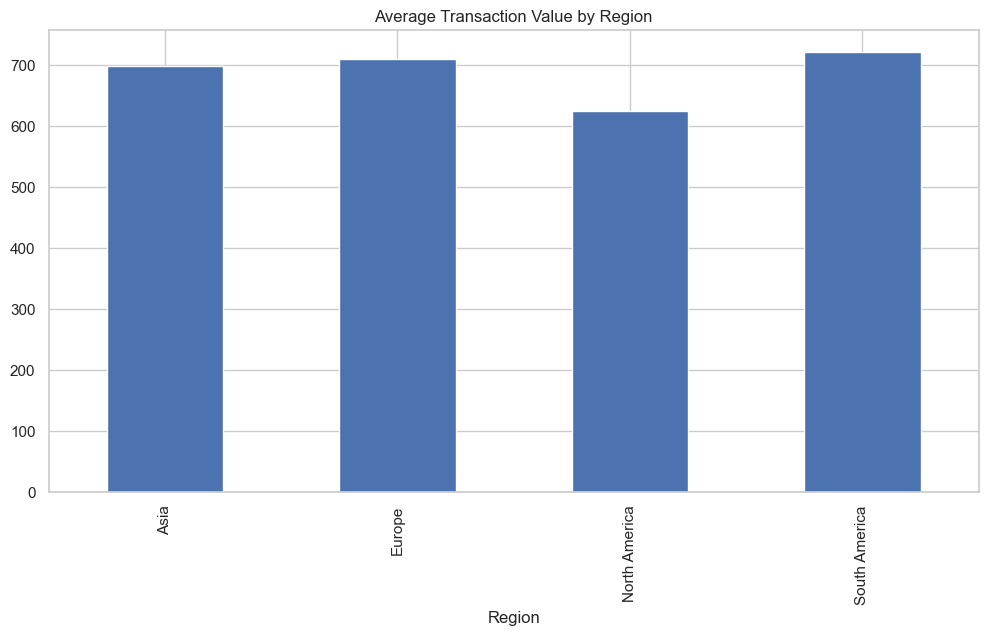

In [15]:
merged_data = transactions.merge(customers, on='CustomerID')
region_avg = merged_data.groupby('Region')['TotalValue'].mean()
region_avg.plot(kind='bar', title='Average Transaction Value by Region')